**Iris Data Set**- *This dataset is perhaps the best known database to be found in the pattern recognition literature. 
The dataset contains 3 classes of 50 instances each, where each class refers to a type of Iris plant namely Setosa, Versicolor and Virginica. One is linearly separable from the other 2 and the latter are not linearly separable from each other.*

*The predicted attribute is the class of Iris plant.*

*The dataset can be loaded from the sklearn library itself.*

In [1]:
#importing all the neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading data from sklearn library
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
X = pd.DataFrame(iris.data, columns = iris.feature_names)
#Making y a Categorical type since it contains categories for 3 different species
y = pd.Categorical.from_codes(iris.target, iris.target_names)

In [4]:
#checking first few of the independent variables
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
#checking records of the target variable
y = pd.get_dummies(y)
y.head()

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [10]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
setosa        150 non-null uint8
versicolor    150 non-null uint8
virginica     150 non-null uint8
dtypes: uint8(3)
memory usage: 530.0 bytes


There are all non null values

In [11]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
y.nunique

<bound method DataFrame.nunique of      setosa  versicolor  virginica
0         1           0          0
1         1           0          0
2         1           0          0
3         1           0          0
4         1           0          0
5         1           0          0
6         1           0          0
7         1           0          0
8         1           0          0
9         1           0          0
10        1           0          0
11        1           0          0
12        1           0          0
13        1           0          0
14        1           0          0
15        1           0          0
16        1           0          0
17        1           0          0
18        1           0          0
19        1           0          0
20        1           0          0
21        1           0          0
22        1           0          0
23        1           0          0
24        1           0          0
25        1           0          0
26        1         

## Data Visualization

**Plotting histogram for petal width**

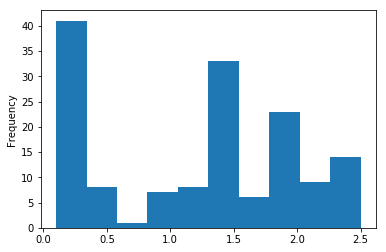

In [13]:
X['petal width (cm)'].plot.hist()
plt.show()

**Training the model**

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
prediction =  dt.predict(X_test)

**Model Evaluation**

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

   micro avg       0.97      0.97      0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30
 samples avg       0.97      0.97      0.97        30



In [17]:
print(confusion_matrix(y_test.values.argmax(axis=1), prediction.argmax(axis=1)))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [18]:
score = accuracy_score(y_test, prediction)
score

0.9666666666666667

**The accuracy of our model is 96%, which is pretty good.**

## Tree Visualization

Scikit learn has some built-in visualization capabilities for decision trees. We might not use it often as it requires us to install graphviz. 

In [19]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
import graphviz
from sklearn import tree

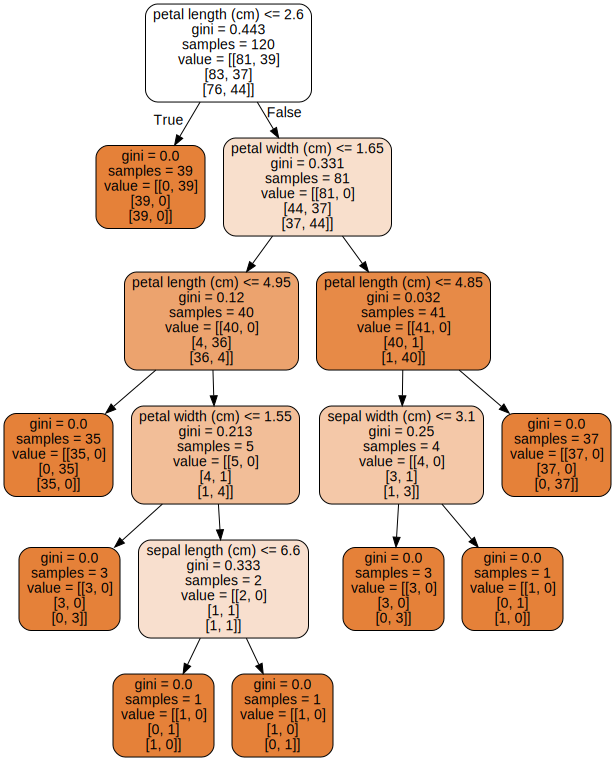

In [20]:
dot_data = tree.export_graphviz(dt, out_file=None, filled=True, rounded=True, feature_names=iris.feature_names, class_names=iris.target_names)
#export_graphviz function converts decision tree classifier into dot file and pydotplus convert this dot file to png or displayable form on Jupyter.
graph = graphviz.Source(dot_data)  
graph